In [1]:
# PART 0 - IMPORTING NECESSARY LIBRARIES 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import httpx

In [3]:
# PART 1 - SCRAPING (25 POINTS)

In [2]:
# Specify the path to your HTML file
file_path = 'C:/Users/İpek Akkuş/Desktop/HW1/CS210 - Homework 1 - for BeautifulSoup.html'
# In order to run the program correct this should be replaced with the path of the HTML file
# which is provided in the homework document. 
# I keep the name same, which is 'CS210 - Homework 1 - for BeautifulSoup.html'


# Read the HTML content from the file
# 'utf-8' is used to correctly interpret the content of the file, especially if it includes non-Latin characters
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table with id 'tracks-table'
table = soup.find('table', {'id': 'tracks-table', 'class': 'info-table'})

# Initialize empty lists to store column names and data
data = []
columns = []

# Extract column names from the header row
header_row = table.find('thead')
columns = [th.text.strip() for th in header_row.find_all('th', {'class': 'th-class'})]

# Extract data from each row
for row in table.find_all('tr', {'data-id-song': True}):
    row_data = [td.text.strip() for td in row.find_all('td')]
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Split the genres using ',' and strip whitespace
df['Genres'] = df['Genres'].str.split(', ')

# Split the genres using ',' and strip whitespace
df['Parent Genres'] = df['Parent Genres'].str.split(', ')

# Convert specific columns to integers
columns_to_convert = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']
# Remove 'db' from the 'Loud' column and convert to integers
df['Loud'] = df['Loud'].str.rstrip(' db').astype(int)
df[columns_to_convert] = df[columns_to_convert].astype(int)
                                                   
# Display the DataFrame
print(df)


       #                                      Song  \
0      1                          Crying Lightning   
1      2                            Buzzcut Season   
2      3                           Ode To The Mets   
3      4  Instant Crush (feat. Julian Casablancas)   
4      5                            I Know The End   
..   ...                                       ...   
321  322                                   forever   
322  323                              Silk Chiffon   
323  324         So Hot You're Hurting My Feelings   
324  325                    First Love/Late Spring   
325  326                                      Ribs   

                           Artist  Popularity  BPM  \
0                  Arctic Monkeys          75  107   
1                           Lorde          73  111   
2                     The Strokes          69   92   
3    Daft Punk,Julian Casablancas          78  110   
4                 Phoebe Bridgers           0  111   
..                         

In [3]:
#2pts - Show the first 3 rows
print(df.head(3))


   #              Song          Artist  Popularity  BPM  \
0  1  Crying Lightning  Arctic Monkeys          75  107   
1  2    Buzzcut Season           Lorde          73  111   
2  3   Ode To The Mets     The Strokes          69   92   

                                              Genres      Parent Genres  \
0  [garage rock, modern rock, permanent wave, roc...             [Rock]   
1               [art pop, metropopolis, nz pop, pop]  [Pop, Electronic]   
2  [alternative rock, garage rock, modern rock, p...             [Rock]   

              Album  Album Date   Time  ...  Happy  Speech  Live  Loud  \
0            Humbug  2009-08-20  03:44  ...     67       0    20    -4   
1      Pure Heroine  2013-09-27  04:06  ...     25       0    10   -11   
2  The New Abnormal  2020-04-10  05:51  ...     20       0    10    -5   

           Key  Time Signature    Added at        Spotify Track Id  \
0      E Minor               4  2023-10-11  6wVWJl64yoTzU27EI8ep20   
1  C♯/D♭ Major           

In [4]:
#1pts - Show the info of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    object
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    int32 
 4   BPM               326 non-null    int32 
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    int32 
 11  Energy            326 non-null    int32 
 12  Acoustic          326 non-null    int32 
 13  Instrumental      326 non-null    int32 
 14  Happy             326 non-null    int32 
 15  Speech            326 non-null    int32 
 16  Live              326 non-null    int32 
 17  Loud            

In [5]:
#2pts - Give the statistical summary of numerical columns
print(df.describe())

       Popularity         BPM       Dance      Energy    Acoustic  \
count   326.00000  326.000000  326.000000  326.000000  326.000000   
mean     50.41411  122.990798   54.895706   60.478528   28.245399   
std      23.10292   25.101822   14.852345   20.385164   29.670725   
min       0.00000   66.000000   11.000000   10.000000    0.000000   
25%      40.00000  106.000000   45.000000   45.000000    2.000000   
50%      55.00000  122.500000   55.000000   61.000000   17.000000   
75%      66.00000  138.000000   66.000000   77.000000   51.750000   
max      93.00000  200.000000   89.000000   98.000000   96.000000   

       Instrumental       Happy      Speech        Live        Loud  \
count    326.000000  326.000000  326.000000  326.000000  326.000000   
mean      13.380368   43.625767    0.858896   12.055215   -8.128834   
std       24.219816   22.836027    3.906409   12.615376    3.079755   
min        0.000000    4.000000    0.000000    0.000000  -20.000000   
25%        0.000000   2

In [6]:
#5pts - Top 10 genres with their counts:

# Create a new DataFrame with each genre in a separate row
df_genres = df.explode('Genres')

# Count the occurrences of each genre
genre_counts = df_genres['Genres'].value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Print the results
print("Top 10 genres with their counts:")
print(top_10_genres.to_string()) 

Top 10 genres with their counts:
Genres
indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37


In [7]:
#6pts - Filter genres that appear more than ten times
# Step 1: Filter genres that occur more than 10 times
popular_genres = genre_counts[genre_counts > 10].index

# Step 2: Merge with the original DataFrame to include popularity scores
filtered_df = df.explode('Genres')
filtered_df = filtered_df[filtered_df['Genres'].isin(popular_genres)]

# Step 3: Calculate the average popularity score and count for each genre
genre_statistics = filtered_df.groupby('Genres').agg({'Popularity': 'mean', 'Genres': 'count'})
genre_statistics.columns = ['Average Popularity', 'Count']

# Step 4: Get the top 5 genres based on average popularity score
top_5_popular_genres = genre_statistics.nlargest(5, 'Average Popularity')

# Print the result with 'Count' and 'Average Popularity' in the same line
print("Top 5 popular genres with their counts and average popularity scores:")
print(top_5_popular_genres.to_string())

Top 5 popular genres with their counts and average popularity scores:
                 Average Popularity  Count
Genres                                    
permanent wave            67.916667     48
pop                       65.823529     34
sheffield indie           65.645161     31
garage rock               65.027027     37
la indie                  62.076923     13


In [8]:
#5pts - Categorize Popularity & BPM Categories and display
# Calculate the 25th, 75th percentiles for Popularity
popularity_25th = df['Popularity'].quantile(0.25)
popularity_75th = df['Popularity'].quantile(0.75)

# Create 'Popularity_Category' column
df['Popularity_Category'] = pd.cut(df['Popularity'],
                                   bins=[-float('inf'), popularity_25th, popularity_75th, float('inf')],
                                   labels=['Low', 'Medium', 'High'])

# Create 'BPM_Category' column
df['BPM_Category'] = pd.cut(df['BPM'],
                            bins=[-float('inf'), 100, 130, float('inf')],
                            labels=['Slow', 'Medium', 'Fast'])

# Print value counts for 'Popularity_Category' and 'BPM_Category'
print("Value counts for Popularity_Category:")
print(df['Popularity_Category'].value_counts().to_string())

print("\nValue counts for BPM_Category:")
print(df['BPM_Category'].value_counts().to_string())

Value counts for Popularity_Category:
Popularity_Category
Medium    163
Low        84
High       79

Value counts for BPM_Category:
BPM_Category
Medium    151
Fast      107
Slow       68


In [9]:
#3pts - Filter a specific song "Crying Lightning" by Arctic Monkeys
# Filter the DataFrame for the specific song and artist
filtered_song = df[(df['Song'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

# Print the filtered result
print("Filtered DataFrame for 'Crying Lightning' by 'Arctic Monkeys':")
print(filtered_song)

Filtered DataFrame for 'Crying Lightning' by 'Arctic Monkeys':
   #              Song          Artist  Popularity  BPM  \
0  1  Crying Lightning  Arctic Monkeys          75  107   

                                              Genres Parent Genres   Album  \
0  [garage rock, modern rock, permanent wave, roc...        [Rock]  Humbug   

   Album Date   Time  ...  Live  Loud      Key  Time Signature    Added at  \
0  2009-08-20  03:44  ...    20    -4  E Minor               4  2023-10-11   

         Spotify Track Id          Album Label  Camelot Popularity_Category  \
0  6wVWJl64yoTzU27EI8ep20  Domino Recording Co       9A                High   

   BPM_Category  
0        Medium  

[1 rows x 26 columns]


In [10]:
#6pts - Name the song with 'High' Popularity and 'Fast BPM'

# Calculate the 75th percentile for Loudness
loudness_75th = df['Loud'].quantile(0.75)

# Filter the DataFrame based on the specified conditions
filtered_tracks = df[
    (df['Popularity_Category'] == 'High') &
    (df['BPM_Category'] == 'Fast') &
    (df['Loud'] > loudness_75th)
]

# Find the most common album among the filtered tracks
most_common_album = filtered_tracks['Album'].mode()
if not most_common_album.empty:
    most_common_album = most_common_album.iloc[0]
else:
    most_common_album = None

# Print the result
print("Name of the most common album among tracks with 'High' popularity, 'Fast' BPM, and above 75th percentile in loudness:")
print(most_common_album)

Name of the most common album among tracks with 'High' popularity, 'Fast' BPM, and above 75th percentile in loudness:
Favourite Worst Nightmare


In [11]:
#5pts - Display te Camelot code among top %10 popular tracks

# Calculate the threshold for the top 10% popularity
popularity_threshold = df['Popularity'].quantile(0.9)

# Filter the DataFrame for tracks in the top 10% popularity
top_10_percent_tracks = df[df['Popularity'] > popularity_threshold]

# Find the most common Camelot code among the filtered tracks,
most_common_camelot_code = top_10_percent_tracks['Camelot'].mode()
if not most_common_camelot_code.empty:
    most_common_camelot_code = most_common_camelot_code.iloc[0]
else:
    most_common_camelot_code = None

# Print the result
print("Most common Camelot code among tracks in the top 10% of popularity:")
print(most_common_camelot_code)


Most common Camelot code among tracks in the top 10% of popularity:
10B


In [14]:
# PART 3 - VISUALIZATION (40 POINTS)

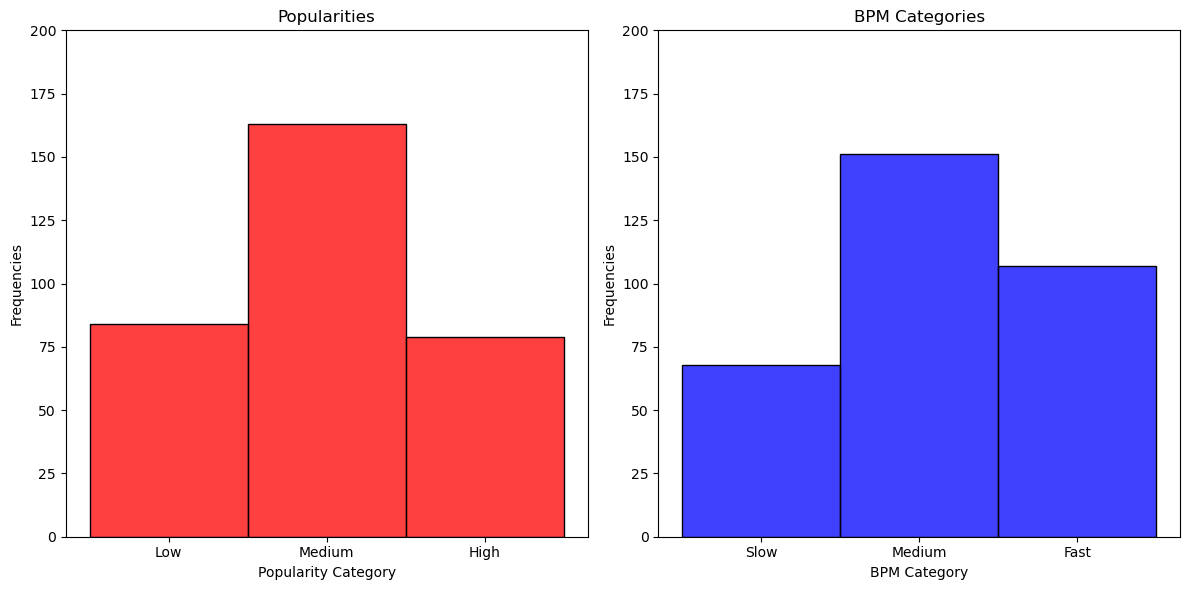

In [12]:
#2pts - Histograms For BPM and Popularity Sub-Categories

# Create a subplot matrix (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'Popularity_Category'
sns.histplot(df['Popularity_Category'], bins=30, color='red', ax=axs[0])
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

# Plot histogram for 'BPM_Category'
sns.histplot(df['BPM_Category'], bins=30, color='blue', ax=axs[1])
axs[1].set_title('BPM Categories')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('BPM Category')
axs[1].set_ylim(0, 200)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

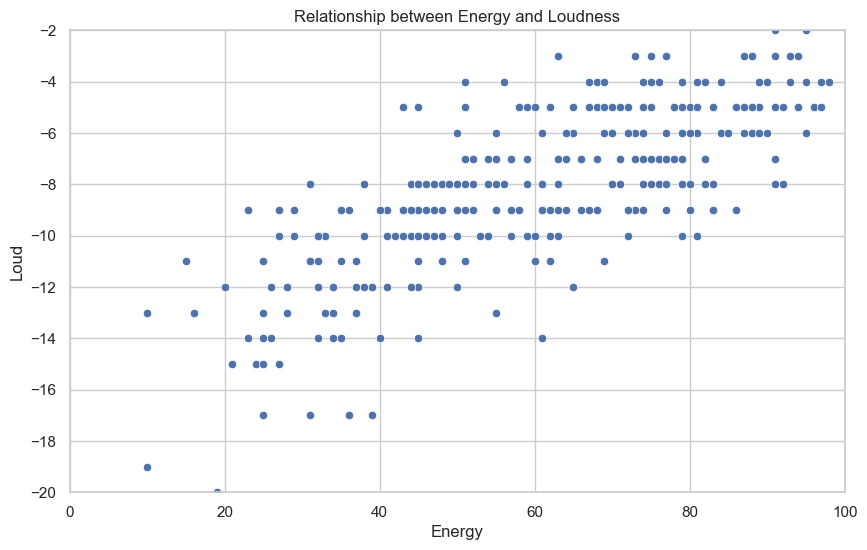

In [13]:
#3pts - Scattered Plot for Relationship between Energy and Loudness

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Loud', data=df)

# Set axis labels and plot title
plt.xlabel('Energy')
plt.ylabel('Loud')
plt.title('Relationship between Energy and Loudness')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(-20, -2)

# Show the plot
plt.show()


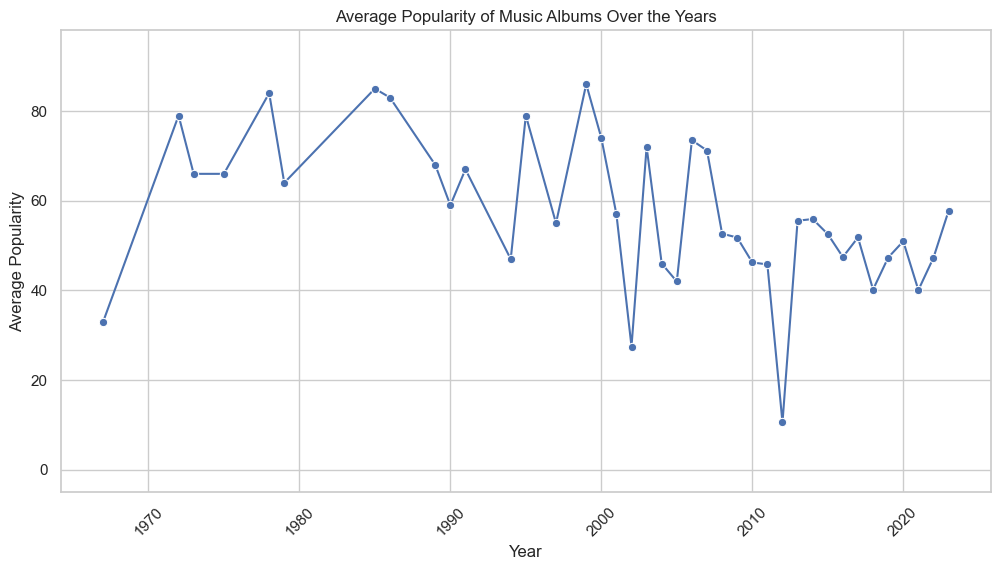

In [14]:
#6pts - Average Popularity of Music Albums Over the Years
# Convert 'Album Date' to datetime format, handling errors
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Drop rows with NaT (if needed)
df = df.dropna(subset=['Album Date'])

# Extract the year from 'Album Date'
df['Year'] = df['Album Date'].dt.year

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a line graph with markers for average popularity over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Popularity', data=df.groupby('Year')['Popularity'].mean().reset_index(), marker='o')

# Set axis labels and plot title
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Over the Years')

# Set y-axis limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

# Rotate x tick values by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

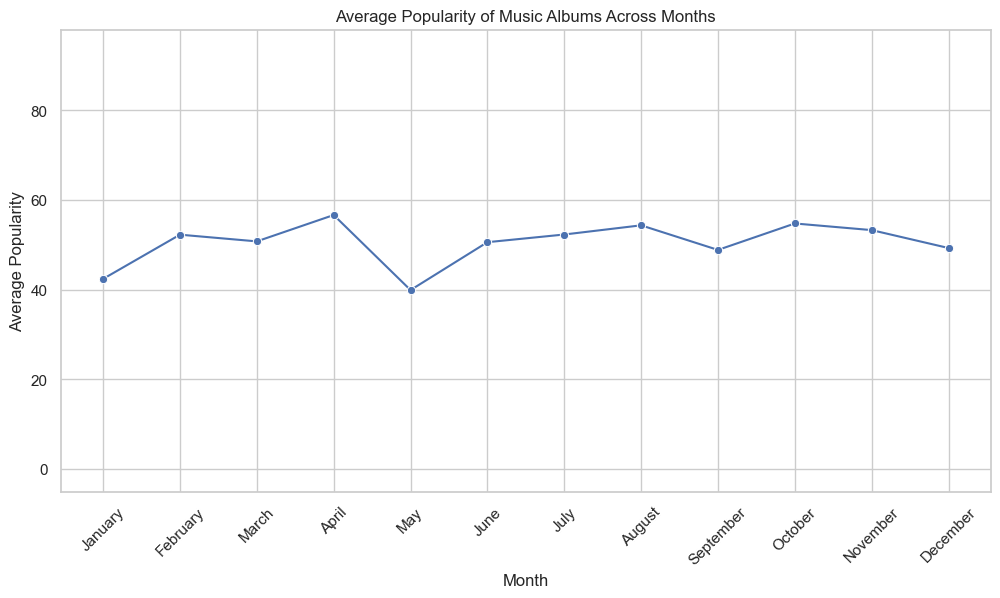

In [15]:
#7pts - Average Popularity of Music Albums Across Months

# Convert 'Album Date' to datetime format, handling errors
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Drop rows with NaT (if needed)
df = df.dropna(subset=['Album Date'])

# Extract the month from 'Album Date'
df['Month'] = df['Album Date'].dt.month_name()

# Define custom order for months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a line graph with markers for average popularity across the months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Popularity', data=df.groupby('Month')['Popularity'].mean().reindex(custom_order).reset_index(), marker='o')

# Set axis labels and plot title
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')

# Set y-axis limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

# Rotate x tick values by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

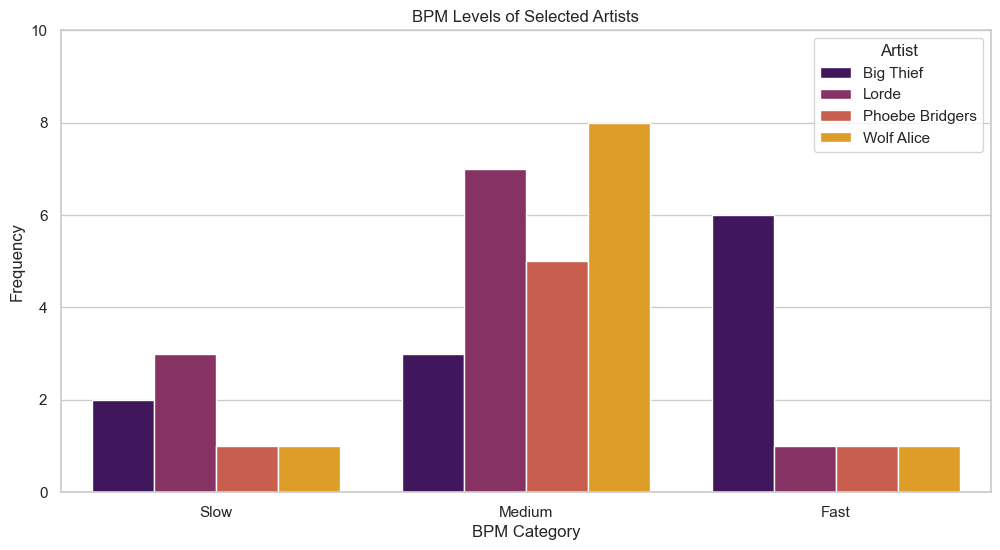

In [16]:
#7pts - BPM Levels of Selected Artists
# Filter the DataFrame for the selected artists
selected_artists = ['Big Thief','Lorde', 'Phoebe Bridgers', 'Wolf Alice']
df_selected = df[df['Artist'].isin(selected_artists)]

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Define the order of BPM categories and artists
bpm_order = ['Slow', 'Medium', 'Fast']
artist_order = ['Big Thief','Lorde', 'Phoebe Bridgers', 'Wolf Alice']

# Create a countplot with different colors for each artist
plt.figure(figsize=(12, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=df_selected, order=bpm_order, hue_order=artist_order, palette='inferno')

# Set axis labels and plot title
plt.xlabel('BPM Category')
plt.ylabel('Frequency')
plt.title('BPM Levels of Selected Artists')

# Set y-axis limits
plt.ylim(0, 10)

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

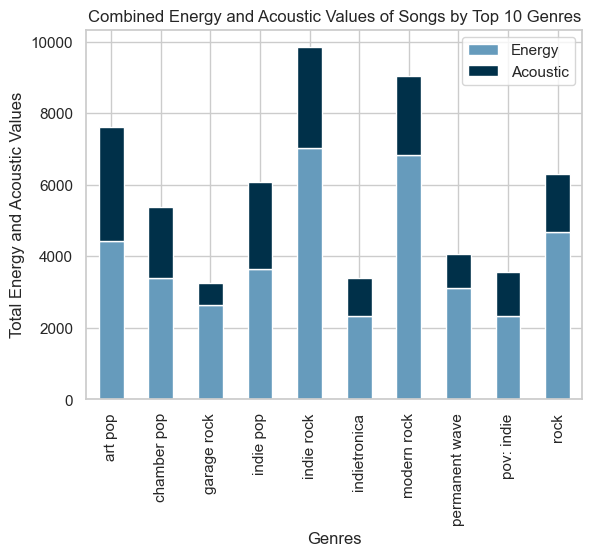

In [17]:
#7pts - Combined Energy and Acoustic Values of Songs by Top 10 Genres

# Explode the 'Genres' column into separate rows
df_expanded_genres = df.explode('Genres')

# Get the top 10 genres
top_10_genres = df_expanded_genres['Genres'].value_counts().head(10).index

# Filter the DataFrame for the top 10 genres
df_top_genres = df_expanded_genres[df_expanded_genres['Genres'].isin(top_10_genres)]

# Group by genres and calculate the sum of Energy and Acoustic values
grouped_df = df_top_genres.groupby('Genres')[['Energy', 'Acoustic']].sum()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Define colors for the stacked bar chart
colors = ['#669bbc', '#003049']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', stacked=True, color=colors)

# Set axis labels and plot title
plt.xlabel('Genres')
plt.ylabel('Total Energy and Acoustic Values')
plt.title('Combined Energy and Acoustic Values of Songs by Top 10 Genres')

# Show the plot
plt.show()

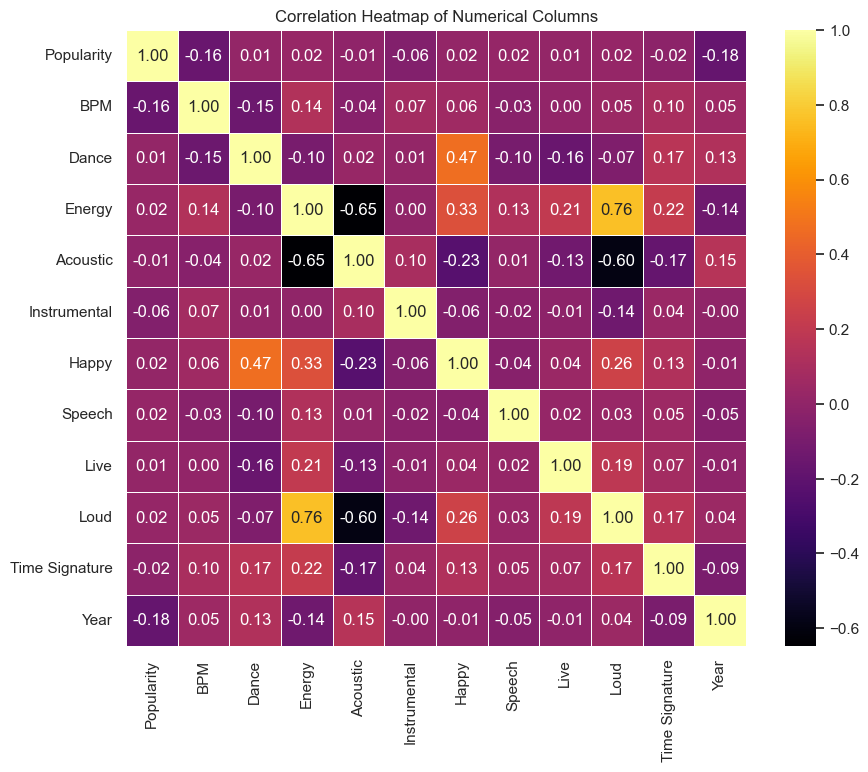

In [18]:
#4pts - Correlation Heatmap of Numerical Columns

# Select only numerical columns
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the style for the plot (optional)
sns.set(style="white")

# Create a heatmap using the inferno color map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()

In [19]:
# 4 pts - ChatGPT History

chat_url = 'https://chat.openai.com/share/94eaed9e-2824-46f9-acdf-ab3a657496b9'
# Make an HTTP request to the URL
response = httpx.get(chat_url)

# Print the HTML content
print(response.text)


<html>
  <head>
    <style global>body{font-family:Arial,Helvetica,sans-serif}.container{align-items:center;display:flex;flex-direction:column;gap:2rem;height:100%;justify-content:center;width:100%}@keyframes enlarge-appear{0%{opacity:0;transform:scale(75%) rotate(-90deg)}to{opacity:1;transform:scale(100%) rotate(0deg)}}.logo{color:#8e8ea0}.scale-appear{animation:enlarge-appear .4s ease-out}@media (min-width:768px){.scale-appear{height:48px;width:48px}}.data:empty{display:none}.data{border-radius:5px;color:#8e8ea0;text-align:center}@media (prefers-color-scheme:dark){body{background-color:#343541}.logo{color:#acacbe}}</style>
  <meta http-equiv="refresh" content="375">
</head>
  <body>
    <div class="container">
      <div class="logo">
        <svg
          width="41"
          height="41"
          viewBox="0 0 41 41"
          fill="none"
          xmlns="http://www.w3.org/2000/svg"
          strokeWidth="2"
          class="scale-appear"
        >
          <path
            d="M3